In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nlp_utils
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
df = pd.read_csv('train.csv')
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
df.shape

(20800, 5)

In [ ]:
pd.set_option('display.max_colwidth', None)  #Increasing width of columns

In [ ]:
df['title']

,title
0,House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart"
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Have Been Identified
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White Supremacy’
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times"
20797,Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times
20798,"NATO, Russia To Hold Parallel Exercises In Balkans"


In [ ]:
df['label'].value_counts()

,count
label,
1,10413
0,10387


In [ ]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
df.reset_index(inplace = True)
df.head(10)

index  id  \
0      0   0   
1      1   1   
2      2   2   
3      3   3   
4      4   4   
5      5   5   
6      7   7   
7      9   9   
8     10  10   
9     11  11   

                                                                                                                          title  \
0                                             House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It   
1                                                                       FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart   
2                                                                                             Why the Truth Might Get You Fired   
3                                                               15 Civilians Killed In Single US Airstrike Have Been Identified   
4                                 Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery   
5  Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart   
6                                       Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times   
7                                 A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times   
8                              Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda   
9                                                                    BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6               Alissa J. Rubin   
7  Megan Twohey and Scott Shane   
8                   Aaron Klein   
9               Chris Tomlinson   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
import re
import string

In [ ]:
#Data Cleaning
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)  #Remove all numbers with letters attached to them
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())  #Remove all punctuations
remove_n = lambda x: re.sub('\n', ' ', x)  #Remove newline characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)  #Remove all non-ASCII characters

df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
df.head(10)

index  id  \
0      0   0   
1      1   1   
2      2   2   
3      3   3   
4      4   4   
5      5   5   
6      7   7   
7      9   9   
8     10  10   
9     11  11   

                                                                                                                          title  \
0                                             House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It   
1                                                                       FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart   
2                                                                                             Why the Truth Might Get You Fired   
3                                                               15 Civilians Killed In Single US Airstrike Have Been Identified   
4                                 Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery   
5  Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart   
6                                       Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times   
7                                 A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times   
8                              Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda   
9                                                                    BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6               Alissa J. Rubin   
7  Megan Twohey and Scott Shane   
8                   Aaron Klein   
9               Chris Tomlinson   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], Y, test_size = 0.33, random_state = 40)

In [ ]:
#First, we use Tf-Idf vectorizer
tfidf_vect = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [ ]:
print(tfidf_vect.get_feature_names_out()[-10:])

['zwozdiak' 'zwrocie' 'zwrotu' 'zwyci' 'zxycmwjdxj' 'zyaratgah' 'zygankow'
 'zynga' 'zytsov' 'zyuganov']


In [ ]:
#Now using count vectorizer
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [ ]:
print(count_vect.get_feature_names_out()[-10:])

['zwozdiak' 'zwrocie' 'zwrotu' 'zwyci' 'zxycmwjdxj' 'zyaratgah' 'zygankow'
 'zynga' 'zytsov' 'zyuganov']


In [ ]:
#Now we will apply different models on these to vectorizers to get the best results for our predictions

#First we apply a Naive Bayes model
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy:  %0.3f" % score)
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy:  0.764
[[3386    8]
 [1419 1222]]


In [ ]:
print('Wrong predictions out of total')
print((y_test !=pred).sum(),'/',((y_test == pred).sum()+(y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(y_test,pred))

Wrong predictions out of total
1427 / 6035
Percentage accuracy:  76.3545981772991


<Axes: >

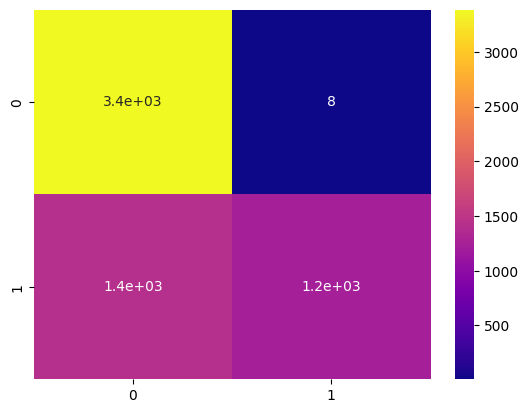

In [ ]:
sns.heatmap(cm, cmap = 'plasma', annot = True)

In [ ]:
#Now applying the naive bayes model on count vectorized data
clf = MultinomialNB()
clf.fit(count_train, y_train)
pred1 = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y_test, pred1)
print(cm2)

accuracy:   0.904
[[3252  142]
 [ 437 2204]]


In [ ]:
print('Wrong predictions out of total')
print((y_test !=pred1).sum(),'/',((y_test == pred1).sum()+(y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(y_test,pred1))

#Therfore when employing Naive Bayes model, count vectorized data gives better accuracy

Wrong predictions out of total
579 / 6035
Percentage accuracy:  90.4059652029826


<Axes: >

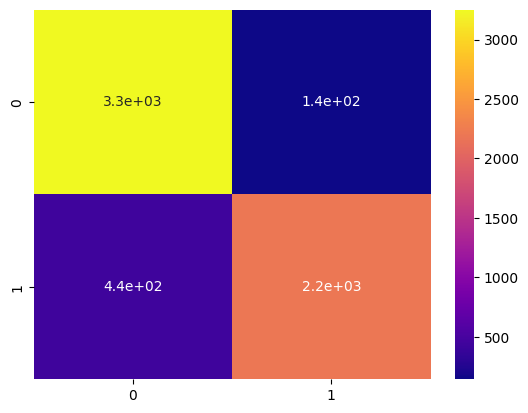

In [ ]:
sns.heatmap(cm2, cmap = 'plasma', annot = True)

In [ ]:
#Now we will do the same as above while using a Random Forest Classifier as our ml model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(tfidf_train, y_train)
#accuracy on train
train_preds2 = RF.predict(tfidf_train)
print(f'Model accuracy on train is: {accuracy_score(y_train, train_preds2)}')
#accuracy on test
test_preds2 = RF.predict(tfidf_test)
print(f'Model accuracy on test is: {accuracy_score(y_test, test_preds2)}')
print('-'*50)

#Confusion Matrix
print(f'Confusion matrix train is: {confusion_matrix(y_train, train_preds2)}')
print(f'Confusion matrix test is: {confusion_matrix(y_test, test_preds2)}')
print('-'*50)
print('Wrong predictions out of total')
print((y_test !=test_preds2).sum(),'/',((y_test == test_preds2).sum()+(y_test != test_preds2).sum()))
print('Percentage accuracy: ',100*accuracy_score(y_test,test_preds2))

Model accuracy on train is: 0.9999183673469387
Model accuracy on test is: 0.9015741507870754
--------------------------------------------------
Confusion matrix train is: [[6966    1]
 [   0 5283]]
Confusion matrix test is: [[3324   70]
 [ 524 2117]]
--------------------------------------------------
Wrong predictions out of total
594 / 6035
Percentage accuracy:  90.15741507870754


In [ ]:
#now, we apply our RF classifer on count vectorized data
RF = RandomForestClassifier().fit(count_train,y_train)
#predict on train
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((y_test !=test_preds3).sum(),'/',((y_test == test_preds3).sum()+(y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  0.9999183673469387
Model accuracy on test is:  0.9002485501242751
--------------------------------------------------
confusion_matrix train is:  [[6966    1]
 [   0 5283]]
confusion_matrix test is:  [[3323   71]
 [ 531 2110]]
Wrong predictions out of total
--------------------------------------------------
602 / 6035
--------------------------------------------------


In [ ]:
#Finally, we will aplly a KNN model on our data and compare it with the other 2 models
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(tfidf_train, y_train)
#predict on train
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds4))
#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds4))
print('-'*50)
print('Wrong predictions out of total')
print((y_test != test_preds4).sum(), '/', ((y_test == test_preds4).sum() + (y_test != test_preds4).sum()))

Model accuracy on train is:  0.5124897959183673
Model accuracy on test is:  0.48864954432477214
--------------------------------------------------
confusion_matrix train is:  [[1010 5957]
 [  15 5268]]
confusion_matrix test is:  [[ 320 3074]
 [  12 2629]]
--------------------------------------------------
Wrong predictions out of total
3086 / 6035


In [ ]:
#Now we apply KNN on count vectorized data
KNN = KNeighborsClassifier()
KNN.fit(count_train, y_train)
#predict on train
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds5))
#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds5))
print('-'*50)
print('Wrong predictions out of total')
print((y_test != test_preds5).sum(), '/', ((y_test == test_preds5).sum() + (y_test != test_preds5).sum()))

Model accuracy on train is:  0.7822857142857143
Model accuracy on test is:  0.7332228666114333
--------------------------------------------------
confusion_matrix train is:  [[4476 2491]
 [ 176 5107]]
confusion_matrix test is:  [[1922 1472]
 [ 138 2503]]
--------------------------------------------------
Wrong predictions out of total
1610 / 6035


In [ ]:
#As we can see from the above results, Random Forest Classifier with either tfidf-vectorized or count-vectorized data,and Naive Bayes model
#with count-vectorized data, all three of these give very promising results